In [13]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# load dataset into the pandas dataframe

DATA_PATH = Path("..\\data\\Telco_Customer_Churn_Dataset  (3).csv")
df = pd.read_csv(DATA_PATH)

# Confirm that the dataset is loaded
#print("Dataset loaded successfullly....")

In [15]:
# Exploratory Data Analysis

# Summary Statistics (Mean, Median, Mode)

In [16]:
# Mean for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64'])

mean_values = numerical_cols.mean()    # to calculate the mean values 
median_values = numerical_cols.median()   # to calculate the median values

mean_values, median_values

(SeniorCitizen      0.162147
 tenure            32.371149
 MonthlyCharges    64.761692
 dtype: float64,
 SeniorCitizen      0.00
 tenure            29.00
 MonthlyCharges    70.35
 dtype: float64)

In [7]:
# Mode - for the categorical columns

categorical_cols = df.select_dtypes(include=['object'])    # select categorical columns
categorical_modes = categorical_cols.mode().iloc[0]

categorical_modes

customerID                0002-ORFBO
gender                          Male
Partner                           No
Dependents                        No
PhoneService                     Yes
MultipleLines                     No
InternetService          Fiber optic
OnlineSecurity                    No
OnlineBackup                      No
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
TotalCharges                        
Churn                             No
Name: 0, dtype: object

In [17]:
# Distribution Analysis (Histogram)

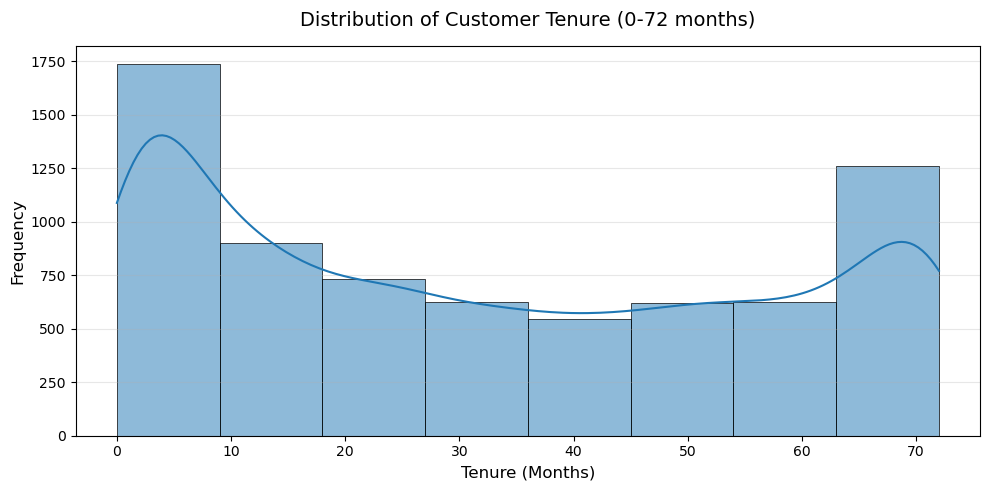

In [18]:
# Histogram for Tenure

plt.figure(figsize=(10, 5))
sns.histplot(df['tenure'], bins=range(0, 73, 9), kde=True, edgecolor='black', linewidth=0.5)
plt.title('Distribution of Customer Tenure (0-72 months)', fontsize=14, pad=15)
plt.xlabel('Tenure (Months)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

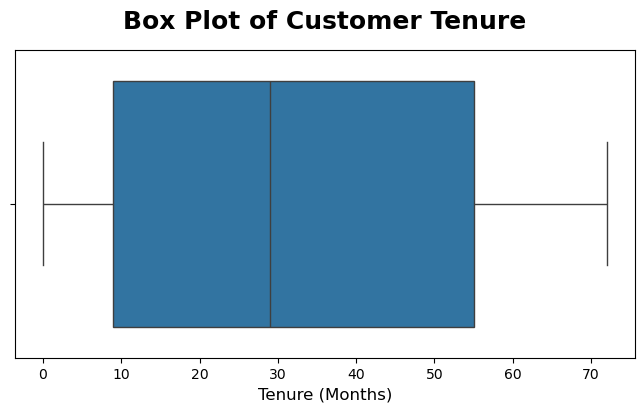

In [53]:
# Box plot for Tenure

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['tenure'])
plt.title('Box Plot of Customer Tenure', fontweight='bold', fontsize=18, pad=15)
plt.xlabel('Tenure (Months)', fontsize=12)
plt.show()

Customer Tenure Analysis Report

While analyzing the distribution of customer tenure, measured in months, across the entire customer base, two visualizations, a histogram and a box plot, were used to understand the spread, concentration, and variability of tenure values. This analysis provides insights into the overall customer lifecycle and patterns of engagement.

*Key Observations:*

Early Tenure Concentration:
A large share of customers fall within the first 0–5 months of tenure, indicating that a significant portion of the customer base is still in the early engagement phase. Thus, highlighting the importance of strong onboarding and early-stage customer experience initiatives.

Mid-Tenure Stability:
Customer tenure between 5 and 55 months is more evenly distributed, suggesting a stable core of customers who remain engaged beyond the initial onboarding period. 
 *Retention appears relatively consistent once customers pass the early stage*.

Long-Term Customer Base:
A clear cluster of customers exists at the upper end of tenure (around 70–72 months), representing long-standing and highly stable customers. This group likely forms a dependable foundation for sustained revenue.

Central Tendency and Spread:
The median customer tenure is approximately 30 months, with half of customers staying between 10 and 55 months. This indicates meaningful variation in customer longevity, but with a strong central core.

Data Consistency:
The absence of extreme outliers confirms that tenure values are well-bounded and reliable, making the dataset suitable for further analytical and modeling work.

What is the Business-Level Insight from the data

1. The early months are critical, as a large number of customers exist in this phase. Strategies around onboarding, early engagement, and initial value delivery could maximize the likelihood of customers moving into the mid- and long-term segments.

2. The long-term segment (~70+ months) represents highly stable customers who provide consistent revenue. This group can serve as a benchmark for retention programs and loyalty initiatives.

3. The median tenure (~30 months) suggests that half of the customers are still within their first three years with the company, which is a key window to monitor and support customer satisfaction and engagement.

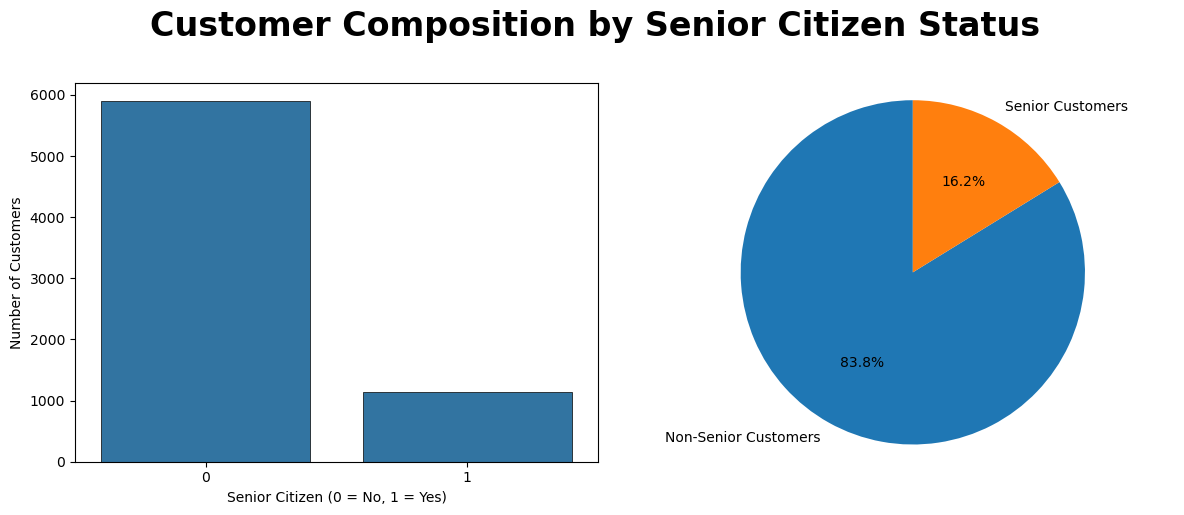

In [35]:
# Visualization of SeniorCitizen data with barplot and piechart

# Count values
senior_counts = df['SeniorCitizen'].value_counts()
labels = ['Non-Senior Customers', 'Senior Customers']

# Create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# plot Bar Plot
sns.barplot(
    x=senior_counts.index,
    y=senior_counts.values,
    edgecolor='black',
    ax=axes[0],
    linewidth=0.5
)
axes[0].set_xlabel('Senior Citizen (0 = No, 1 = Yes)')
axes[0].set_ylabel('Number of Customers')

# plot Pie Chart 
axes[1].pie(
    senior_counts.values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)
axes[1].axis('equal')  # Keeps pie circular

fig.suptitle(
    'Customer Composition by Senior Citizen Status',
    fontsize=24,
    fontweight='bold',
    y=1.02
)

# Layout adjustment
plt.tight_layout()
plt.show()


Customer Composition by Senior Citizen Status

The customer base is primarily composed of non-senior customers, who account for the majority of total subscribers. Senior citizens represent a smaller but clearly defined segment of the overall population.

From a volume perspective, the bar chart confirms that non-senior customers form the core of the customer base, indicating where most operational activity and service usage are concentrated. In comparison, the senior segment, while smaller in size, remains material enough to warrant targeted consideration.

From a proportional standpoint, the pie chart reinforces this imbalance by showing that senior citizens constitute a relatively limited share of total customers. This segmentation establishes a clear demographic structure within the customer base.

Business Implication:
Understanding this demographic distribution is foundational for subsequent analysis. It provides context for evaluating customer behavior, service adoption patterns, and future segmentation strategies, ensuring that insights derived in later stages are interpreted relative to the actual composition of the customer population.

In [ ]:
# Visualization for Monthly Charges data

Business questions to answer:

1. What does the overall pricing distribution look like?
2. How do monthly charges differ between senior and non-senior customers?
3. Who contributes more to total monthly revenue?
4. Average Revenue per Customer (ARPC) by Segment

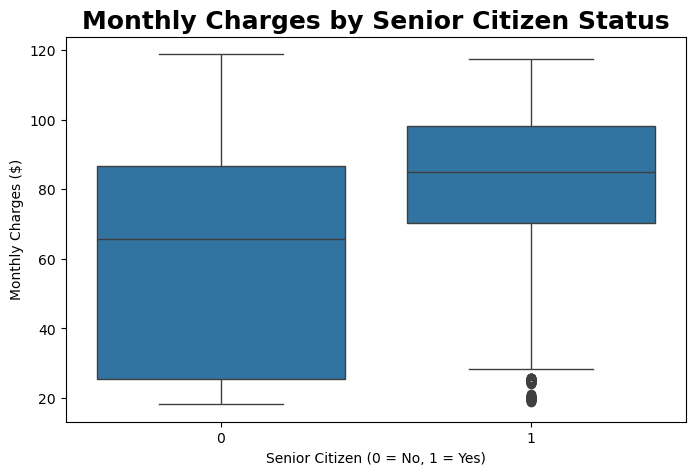

In [54]:
# Analysis 1

plt.figure(figsize=(8, 5))
sns.boxplot(x='SeniorCitizen', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Senior Citizen Status', fontweight='bold', fontsize=18)
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Monthly Charges ($)')
plt.show()

Monthly Charges by Senior Citizen Status

1. The distribution of monthly charges differs clearly between senior and non-senior customers. Senior customers exhibit a higher median monthly charge, indicating that they typically subscribe to higher-priced service plans.

2. Non-senior customers display a wider spread of monthly charges, spanning low-cost to premium plans. This reflects greater variability in service selection within this segment.

3. Senior customers show a more concentrated pricing range, with fewer low-cost plans and more consistency around higher price points. A small number of low-charge outliers exist but do not materially affect the overall pattern.

Business Implication:
While non-senior customers dominate in volume and pricing diversity, senior customers represent a higher-value segment on a per-customer basis. This distinction is important for understanding revenue structure prior to further behavioral analysis.

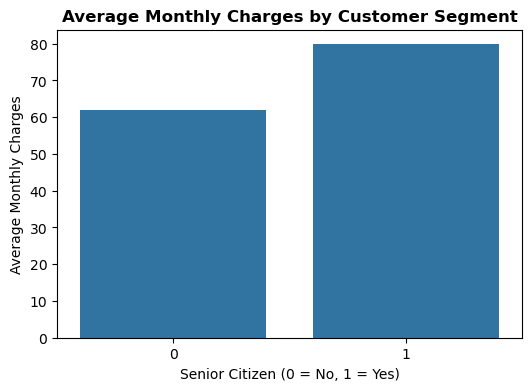

In [51]:
# Analysis 2

avg_charges = df.groupby('SeniorCitizen')['MonthlyCharges'].mean()

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_charges.index, y=avg_charges.values)
plt.title('Average Monthly Charges by Customer Segment', fontweight='bold', fontsize=12)
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Average Monthly Charges')
plt.show()

Average monthly charges by customers

The senior citizen customers are shown to contribute to a higher average monthly charge for this enterprise compared to the non-senior citizens. This indicates that senior customers may be opting for premium plans, additional services, or higher usage levels.

Business implication:
The higher average revenue from senior customers presents an opportunity to design targeted marketing strategies, loyalty programs, or service bundles specifically for this segment. Focusing on retention and personalized offerings for senior customers could maximize revenue, improve customer satisfaction, and strengthen long-term profitability. Additionally, understanding the drivers behind their higher charges can inform pricing and service development decisions for other customer segments.

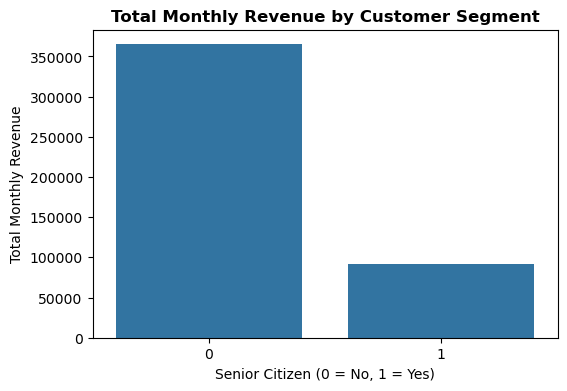

In [48]:
revenue = df.groupby('SeniorCitizen')['MonthlyCharges'].sum()

plt.figure(figsize=(6, 4))
sns.barplot(x=revenue.index, y=revenue.values)
plt.title('Total Monthly Revenue by Customer Segment', fontweight='bold', fontsize=12)
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Total Monthly Revenue')
plt.show()

Total Monthly Revenue by Customer Segment

The Non-Senior Citizen customers appear to contribute the highest share of total monthly revenue for the enterprise. This suggests that, despite potentially lower average monthly charges per customer compared to Senior Citizens, the larger population size of Non-Senior customers drives the overall revenue dominance.

Business Implication:
Given their significant impact on total revenue, Non-Senior customers represent a critical segment for revenue growth and stability. Strategic initiatives such as tailored promotions, upselling opportunities, and targeted retention campaigns for this segment can help maximize revenue. Also, insights from this segment can guide product development, pricing strategies, and marketing focus to further strengthen enterprise profitability.